In [1]:
%cd /rna/junyoung/prj/class/binfo1-work

/rna/junyoung/prj/class/binfo1-work


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
print(len(cnts))
cnts.head()

55359


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,0,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,0,0


In [3]:
readcounts = 10
cnts_sorted = cnts.loc[(cnts['RNA-control.bam'] > readcounts) &
                       (cnts['RNA-siLin28a.bam'] > readcounts) &
                       (cnts['RNA-siLuc.bam'] > readcounts) &
                       (cnts['CLIP-35L33G.bam'] > readcounts) &
                       (cnts['RPF-siLin28a.bam'] > readcounts) &
                       (cnts['RPF-siLuc.bam'] > readcounts)]
cnts_sorted

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,0,0,74,95,93,100,42,75
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,0,0,3,1355,3022,2563,1859,3191
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,0,0,44,574,1219,1236,33,44
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,0,0,607,762,2130,2225,328,609
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,0,0,1121,474,1260,1031,603,1128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,0,0,0,4764,5281,15549,17408,5986,5305
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,0,0,0,27,1976,6741,8052,11471,10842
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,0,0,0,2,61,30,25,18,19


In [4]:
total_counts = cnts_sorted.iloc[:,5:15]

In [5]:
rpm = total_counts.divide(total_counts.sum(axis=0)) * 1e6
rpkm = rpm.divide(cnts_sorted['Length'] / 1e3, axis=0)
tpm = rpkm.divide(rpkm.sum(axis=0) / 1e6, axis=1)
l2rpm = np.log2(rpm + 1)
l2tpm = np.log2(tpm + 1)

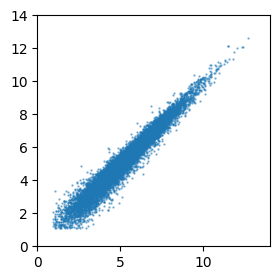

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(l2rpm['RNA-siLin28a.bam'],l2rpm['RNA-siLuc.bam'], alpha = 0.5, s= 0.5)
ax.set_xlim(0,14)
ax.set_ylim(0,14)
None

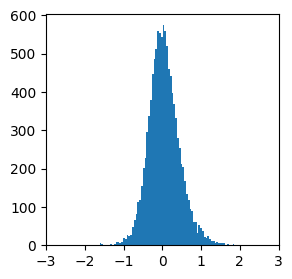

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.hist(l2rpm['RNA-siLin28a.bam'] - l2rpm['RNA-siLuc.bam'], bins= 100)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
None

In [8]:
total_gene_list = cnts_sorted.index.str.split('.').str[0].copy()
total_gene_list = total_gene_list.tolist()
total_gene_list[:5]
len(total_gene_list)

10944

In [9]:
rpm.head()

,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,
ENSMUSG00000103922.2,13.861808,NaN,NaN,NaN,8.208091,19.382031,7.693224,10.470116,4.041636,5.970216
ENSMUSG00000033845.14,304.050807,NaN,NaN,NaN,0.332760,276.448975,249.988419,268.349061,178.890515,254.012781
ENSMUSG00000025903.15,154.903812,NaN,NaN,NaN,4.880486,117.108274,100.839140,129.410628,3.175571,3.502527
ENSMUSG00000033813.16,125.589496,NaN,NaN,NaN,67.328527,155.464295,176.199647,232.960070,31.563254,48.478152
ENSMUSG00000033793.13,84.155567,NaN,NaN,NaN,124.341481,96.706136,104.230777,107.946891,58.026348,89.792045


In [10]:
cnts_sorted['clip_enrichment'] = rpm['CLIP-35L33G.bam']/rpm['RNA-control.bam'].copy()
cnts_sorted['rden_change'] = (rpm['RPF-siLin28a.bam']/rpm['RNA-siLin28a.bam']) / (rpm['RPF-siLuc.bam']/rpm['RNA-siLuc.bam']).copy()
cnts_sorted = cnts_sorted.dropna()
cnts_sorted

/tmp/ipykernel_2661618/3858131666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['clip_enrichment'] = rpm['CLIP-35L33G.bam']/rpm['RNA-control.bam'].copy()
/tmp/ipykernel_2661618/3858131666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['rden_change'] = (rpm['RPF-siLin28a.bam']/rpm['RNA-siLin28a.bam']) / (rpm['RPF-siLuc.bam']/rpm['RNA-siLuc.bam']).copy()


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,0,0,74,95,93,100,42,75,0.715189,0.921320
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,0,0,3,1355,3022,2563,1859,3191,1.099844,0.755983
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,0,0,44,574,1219,1236,33,44,1.322740,1.163540
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,0,0,607,762,2130,2225,328,609,0.807835,0.860820
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,0,0,1121,474,1260,1031,603,1128,0.870220,0.669270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,0,0,0,4764,5281,15549,17408,5986,5305,0.257662,1.932871
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,0,0,0,27,1976,6741,8052,11471,10842,0.313027,1.933644
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,0,0,0,2,61,30,25,18,19,0.493002,1.207933


In [11]:
import gseapy as gp
import networkx as nx
from gprofiler import GProfiler

Grouping of Rd & Cl value; exp: Rdl_Cll: Rd low & Cl low
Rd: Ribosome density change
Cl: Clip enrichemnt value
l: low
h: high

In [12]:
upvalue = 0.5
downvalue = -0.5
Cll_Rdl = cnts_sorted.loc[(np.log2(cnts_sorted['clip_enrichment']) < downvalue) &
                          (np.log2(cnts_sorted['rden_change']) < downvalue)].copy()
Cll_Rdh = cnts_sorted.loc[(np.log2(cnts_sorted['clip_enrichment']) < downvalue) &
                          (np.log2(cnts_sorted['rden_change']) > upvalue)].copy()
Clh_Rdl = cnts_sorted.loc[(np.log2(cnts_sorted['clip_enrichment']) > upvalue) &
                          (np.log2(cnts_sorted['rden_change']) < downvalue)].copy()
Clh_Rdh = cnts_sorted.loc[(np.log2(cnts_sorted['clip_enrichment']) > upvalue) &
                          (np.log2(cnts_sorted['rden_change']) > upvalue)].copy()

In [13]:
len(Cll_Rdl)

2734

In [14]:
Cll_Rdl_list = Cll_Rdl.index.to_series().str.split('.').str.get(0).tolist()
Cll_Rdh_list = Cll_Rdh.index.to_series().str.split('.').str.get(0).tolist()
Clh_Rdl_list = Clh_Rdl.index.to_series().str.split('.').str.get(0).tolist()
Clh_Rdh_list = Clh_Rdh.index.to_series().str.split('.').str.get(0).tolist()

In [15]:
def batched(iterable, n): 
    items = []
    for item in iterable:
        items.append(item)
        if len(items) == n:
            yield items
            items = []
    if items:
        yield items

bm = gp.biomart.Biomart()
results = []

for batch in batched(total_gene_list, 300):
    res = bm.query(dataset='mmusculus_gene_ensembl',
                   attributes=['ensembl_gene_id', 'external_gene_name'],
                   filters={'ensembl_gene_id': batch})
    results.append(res)

results = pd.concat(results)
results.head()

,ensembl_gene_id,external_gene_name
0,ENSMUSG00000001138,Cnnm3
1,ENSMUSG00000001143,Lman2l
2,ENSMUSG00000002881,Nab1
3,ENSMUSG00000003134,Tbc1d8
4,ENSMUSG00000003135,Cnot11


In [16]:
total_genenames = results['external_gene_name'].dropna().drop_duplicates().tolist()
len(total_genenames)

10941

In [17]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [18]:
enr = gp.enrichr(gene_list=total_genenames,
                 gene_sets= ['GO_Biological_Process_2023','GO_Cellular_Component_2023', 'GO_Molecular_Function_2023'],
                 organism='Mouse',
                 outdir= None,
                 cutoff=0.1)
enr.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,RNA Binding (GO:0003723),1210/1411,1.924163e-146,2.131973e-143,0,0,5.479835,1838.610454,POP5;RAMAC;POP7;SLC4A1AP;TFRC;POP1;POP4;NOC2L;...
1,GO_Molecular_Function_2023,Cadherin Binding (GO:0045296),264/319,1.401317e-26,7.763295e-24,0,0,4.047879,240.969405,TES;RPL34;ENO1;F11R;FNBP1L;RPL6;CRKL;GOLGA2;GO...
2,GO_Molecular_Function_2023,GTPase Binding (GO:0051020),190/225,1.570803e-21,5.801498e-19,0,0,4.556546,218.270868,USP6NL;CYFIP1;NCKAP1;DENND5B;GCC2;CIB1;STK19;E...
3,GO_Molecular_Function_2023,mRNA Binding (GO:0003729),228/282,1.553174e-20,4.302292e-18,0,0,3.549063,161.877733,EIF4A1;RPL5;SLC4A1AP;EIF4A3;HNRNPU;HNRNPR;ADAR...
4,GO_Molecular_Function_2023,Ubiquitin-Like Protein Ligase Binding (GO:0044...,229/289,1.512772e-18,3.352303e-16,0,0,3.206328,131.563927,RB1;RPL5;SMC6;UBE2L3;HERC2;TRIM28;CHEK2;PSMD1;...


In [19]:
gp2 = GProfiler(return_dataframe=True)
result = gp2.profile(organism='mmusculus', query=total_gene_list, sources=["GO:BP", "GO:MF", "GO:CC"])
result

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0043227,membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",14934,10196,7865,26995,0.771381,0.526651,query_1,[GO:0043226]
1,GO:BP,GO:0044238,primary metabolic process,4.940656e-324,True,"""The chemical reactions and pathways involving...",12727,10128,6365,26944,0.628456,0.500118,query_1,[GO:0008152]
2,GO:MF,GO:0003824,catalytic activity,4.940656e-324,True,"""Catalysis of a biochemical reaction at physio...",5738,10129,3623,25063,0.357686,0.631405,query_1,[GO:0003674]
3,GO:BP,GO:0044271,cellular nitrogen compound biosynthetic process,4.940656e-324,True,"""The chemical reactions and pathways resulting...",4715,10128,3036,26944,0.299763,0.643902,query_1,"[GO:0034641, GO:0044249]"
4,GO:CC,GO:0005622,intracellular anatomical structure,4.940656e-324,True,"""A component of a cell contained within (but n...",17412,10196,9045,26995,0.887113,0.519469,query_1,[GO:0110165]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,GO:BP,GO:0070071,proton-transporting two-sector ATPase complex ...,4.999870e-02,True,"""The aggregation, arrangement and bonding toge...",17,10128,15,26944,0.001481,0.882353,query_1,[GO:0065003]
3164,GO:BP,GO:0098761,cellular response to interleukin-7,4.999870e-02,True,"""Any process that results in a change in state...",17,10128,15,26944,0.001481,0.882353,query_1,"[GO:0071345, GO:0098760]"
3165,GO:BP,GO:0032239,regulation of nucleobase-containing compound t...,4.999870e-02,True,"""Any process that modulates the frequency, rat...",17,10128,15,26944,0.001481,0.882353,query_1,"[GO:0015931, GO:0051049]"
3166,GO:BP,GO:0033750,ribosome localization,4.999870e-02,True,"""A process in which a ribosome is transported ...",17,10128,15,26944,0.001481,0.882353,query_1,[GO:0051640]


In [25]:
preranked_clip = pd.concat([pd.Series(total_genenames),np.log2(cnts_sorted['clip_enrichment']).reset_index()], axis=1, ignore_index=True).drop(1, axis=1).dropna().copy()
preranked_clip = preranked_clip.sort_values(by=[2], ascending=False)
preranked_clip[0] = preranked_clip[0].str.upper().dropna().drop_duplicates()
preranked_clip

,0,2
10935,2810403D21RIK,8.621647
7879,SLC35B3,6.609470
10930,GM6368,5.559009
10928,TRAPPC2,5.061259
6907,HEATR6,5.055157
...,...,...
9147,GTF2E1,-6.190488
2754,TRP73,-6.192661
4098,SAE1,-6.315348
10936,PLATR21,-6.393651


In [24]:
pre_res_clip = gp.prerank(preranked_clip, gene_sets=['GO_Biological_Process_2023','GO_Cellular_Component_2023', 'GO_Molecular_Function_2023'],
                     permutation_num=5000, threads=4,
                     outdir=None,
                     ascending=True,
                     format='png', seed=42, verbose=True)
pre_res_clip.res2d.head(10)

2024-06-05 22:53:47,470 [WARNING] Duplicated values found in preranked stats: 11.35% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-05 22:53:47,471 [INFO] Parsing data files for GSEA.............................
2024-06-05 22:53:47,472 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-05 22:53:47,499 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-05 22:53:47,504 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-05 22:53:47,543 [INFO] 4704 gene_sets have been filtered out when max_size=500 and min_size=15
2024-06-05 22:53:47,544 [INFO] 2324 gene_sets used for further statistical testing.....
2024-06-05 22:53:47,545 [INFO] Start to run GSEA...Might take a while..................
2024-06-05 22:56:13,804 [INFO] Congratulations. GSEApy runs successfully.............

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,GO_Biological_Process_2023__Positive Regulatio...,-0.514233,-1.877134,0.005882,0.721871,0.4424,5/17,5.07%,DDR2;FN1;NDUFS4;LIG4;PDGFC
1,prerank,GO_Biological_Process_2023__Regulation Of Prot...,0.603509,1.693156,0.003624,1.0,0.9626,13/22,25.12%,SNX12;HSPA8;P3H1;NDEL1;GAPVD1;ATP13A2;WWP2;RHB...
2,prerank,GO_Biological_Process_2023__Platelet Aggregati...,-0.431364,-1.643368,0.028053,1.0,0.9076,4/19,7.38%,TYRO3;ACTN1;ACTG1;PIK3CB
3,prerank,GO_Cellular_Component_2023__9+2 Motile Cilium ...,-0.464866,-1.639988,0.025,1.0,0.9128,6/15,11.76%,IFT88;DNAH1;IFT27;DNAH2;CUL3;ATP2B4
4,prerank,GO_Cellular_Component_2023__U5 snRNP (GO:0005682),0.590867,1.605127,0.011657,1.0,1.0,9/18,19.60%,TXNL4B;SNRPN;TXNL4A;CD2BP2;SNRPG;SNRPD3;PRPF18...
5,prerank,GO_Biological_Process_2023__Negative Regulatio...,0.611168,1.589803,0.01339,1.0,1.0,10/15,25.24%,PPP3R1;PKD2;CALM3;UBQLN1;FKBP1B;CBARP;FMR1;SRI...
6,prerank,GO_Biological_Process_2023__fatty-acyl-CoA Bio...,0.567506,1.586403,0.010821,1.0,1.0,8/21,12.78%,SLC27A2;HSD17B12;HACD1;ACSL6;PPT2;ACAT1;ELOVL1...
7,prerank,GO_Biological_Process_2023__DNA Integrity Chec...,0.50972,1.583021,0.009114,1.0,1.0,17/38,28.75%,HINFP;RHNO1;CEP63;RAD9A;DOT1L;CLOCK;TIMELESS;C...
8,prerank,GO_Biological_Process_2023__Collagen Fibril Or...,0.580332,1.562725,0.014811,1.0,1.0,8/17,20.70%,SERPINH1;TGFBR1;COL5A1;COL2A1;PLOD3;COL5A2;COL...
9,prerank,GO_Biological_Process_2023__Ceramide Biosynthe...,-0.371711,-1.559307,0.022917,1.0,0.9746,7/25,10.79%,CLN8;GBA1;ASAH1;SAMD8;SGMS1;SPTLC2;DEGS1
